In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob


In [2]:

data_dir_train = pathlib.Path("C:\Major Project 2023 7th sem\Data Set 2\Train")
data_dir_test = pathlib.Path("C:\Major Project 2023 7th sem\Data Set 2\Test")


In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)


2239
118


In [4]:
batch_size = 32
img_height = 180
img_width = 180


In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size = (img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


# New Section

In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size = (img_height, img_width),
    batch_size=batch_size
)


Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)


['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


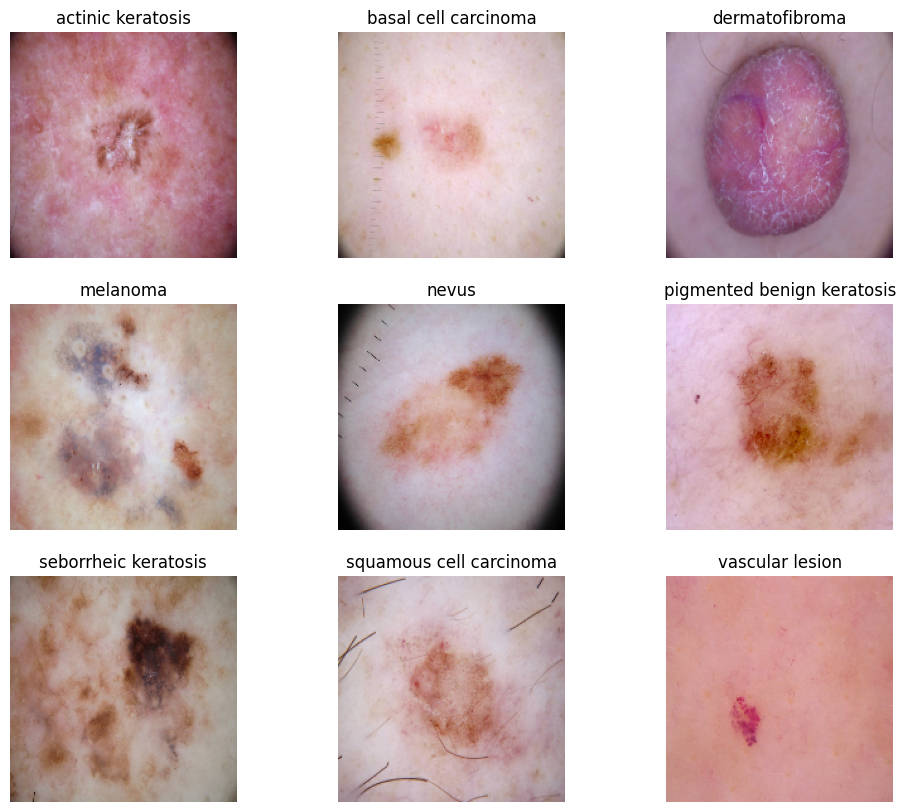

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
for i in range(len(class_names)):
  filtered_ds = train_ds.filter(lambda x,l:tf.math.equal(l[0], i))
  for image, label in filtered_ds.take(1):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(image[0].numpy().astype('uint8'))
    plt.title(class_names[label.numpy()[0]])
    plt.axis('off')


In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)



In [10]:
num_classes = len(class_names)

In [11]:

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


c:\Users\91939\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [13]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 252ms/step - accuracy: 0.1949 - loss: 2.4131 - val_accuracy: 0.1924 - val_loss: 2.0885
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 200ms/step - accuracy: 0.2150 - loss: 2.0072 - val_accuracy: 0.2125 - val_loss: 1.9955
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 200ms/step - accuracy: 0.2547 - loss: 1.9568 - val_accuracy: 0.2752 - val_loss: 1.9187
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 202ms/step - accuracy: 0.3161 - loss: 1.8827 - val_accuracy: 0.2908 - val_loss: 1.9240
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 199ms/step - accuracy: 0.3631 - loss: 1.7663 - val_accuracy: 0.4228 - val_loss: 1.7002
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 201ms/step - accuracy: 0.4641 - loss: 1.5246 - val_accuracy: 0.3803 - val_loss: 1.7775
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 202ms/step - accuracy: 0.5019 - loss: 1.4703 - val_accuracy: 0.5302 - val_loss: 1.4288
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 200ms/step - accuracy: 0.5209 - loss: 1.3526 - val_accu

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']



In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']


In [16]:
epochs_range = range(epochs)



Text(0.5, 1.0, 'Training and Validation Accuracy')

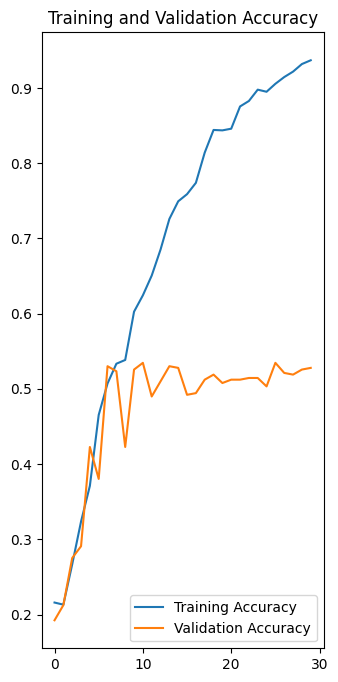

In [17]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')



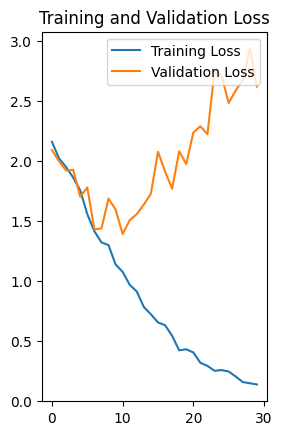

In [18]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [19]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)



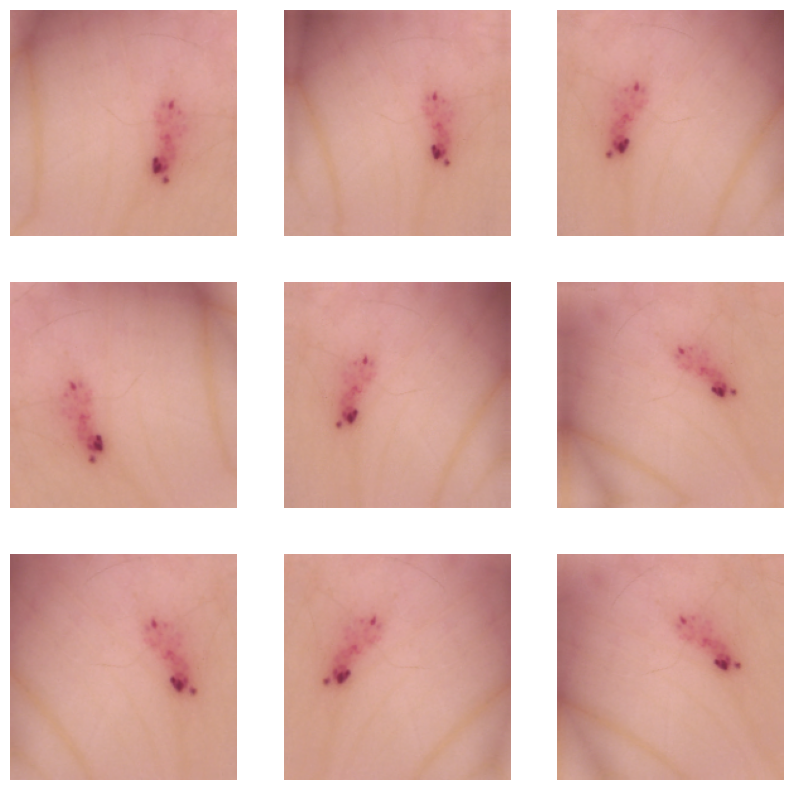

In [20]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")



In [21]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [23]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)



Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 232ms/step - accuracy: 0.2510 - loss: 2.1107 - val_accuracy: 0.5034 - val_loss: 1.6415
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 239ms/step - accuracy: 0.4658 - loss: 1.5975 - val_accuracy: 0.4787 - val_loss: 1.4575
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 232ms/step - accuracy: 0.4787 - loss: 1.4803 - val_accuracy: 0.5213 - val_loss: 1.4410
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 228ms/step - accuracy: 0.5052 - loss: 1.4143 - val_accuracy: 0.5101 - val_loss: 1.3850
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 226ms/step - accuracy: 0.5109 - loss: 1.3449 - val_accuracy: 0.5436 - val_loss: 1.3519
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 225ms/step - accuracy: 0.5694 - loss: 1.2662 - val_accuracy: 0.5190 - val_loss: 1.3837
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 227ms/step - accuracy: 0.5440 - loss: 1.3332 - val_accuracy: 0.4743 - val_loss: 1.4656
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 229ms/step - accuracy: 0.5389 - loss: 1.2568 - val_accu

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']



In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']



In [26]:
epochs_range = range(epochs)



Text(0.5, 1.0, 'Training and Validation Accuracy')

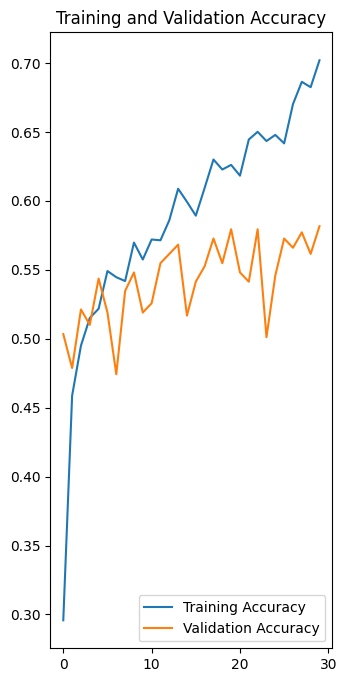

In [27]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')



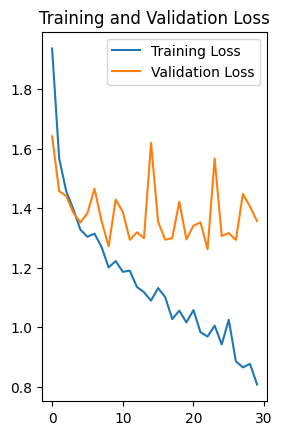

In [28]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [29]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dict_original = dict(zip(path_list, lesion_list))
df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
df



,Path,Label
0,C:\Major Project 2023 7th sem\Data Set 2\Train...,actinic keratosis
1,C:\Major Project 2023 7th sem\Data Set 2\Train...,actinic keratosis
2,C:\Major Project 2023 7th sem\Data Set 2\Train...,actinic keratosis
3,C:\Major Project 2023 7th sem\Data Set 2\Train...,actinic keratosis
4,C:\Major Project 2023 7th sem\Data Set 2\Train...,actinic keratosis
...,...,...
2234,C:\Major Project 2023 7th sem\Data Set 2\Train...,vascular lesion
2235,C:\Major Project 2023 7th sem\Data Set 2\Train...,vascular lesion
2236,C:\Major Project 2023 7th sem\Data Set 2\Train...,vascular lesion
2237,C:\Major Project 2023 7th sem\Data Set 2\Train...,vascular lesion


In [30]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter



In [31]:
X, y = df['Path'], df['Label']
y = LabelEncoder().fit_transform(y)
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))



Class=0, n=114 (5.092%)
Class=1, n=376 (16.793%)
Class=2, n=95 (4.243%)
Class=3, n=438 (19.562%)
Class=4, n=357 (15.945%)
Class=5, n=462 (20.634%)
Class=6, n=77 (3.439%)
Class=7, n=181 (8.084%)
Class=8, n=139 (6.208%)


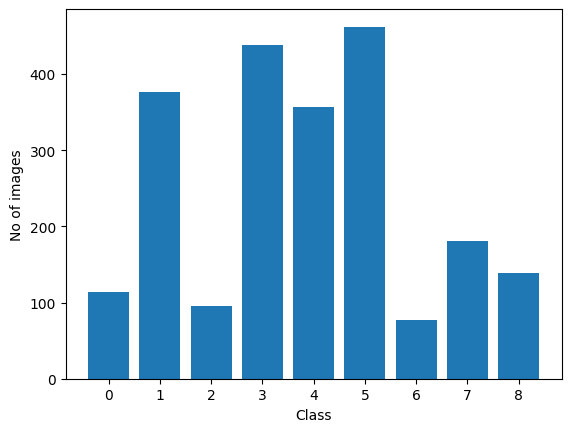

In [32]:
plt.bar(counter.keys(), counter.values())
plt.xticks([i for i in range(9)])
plt.xlabel("Class")
plt.ylabel("No of images")
plt.show()



In [33]:
%pip install Augmentor



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
path_to_training_dataset = 'C:\Major Project 2023 7th sem\Data Set 2\Train'
import Augmentor
for i in class_names:
#     print(str(path_to_training_dataset) + "/" + i)
    p = Augmentor.Pipeline(str(path_to_training_dataset) + "/" + i, output_directory = '/kaggle/working/' + i +'/output/')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:/kaggle/working/actinic keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E46279A110>: 100%|██████████| 500/500 [00:02<00:00, 238.19 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to C:/kaggle/working/basal cell carcinoma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E4E5562550>: 100%|██████████| 500/500 [00:02<00:00, 192.35 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to C:/kaggle/working/dermatofibroma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E4691581D0>: 100%|██████████| 500/500 [00:02<00:00, 181.39 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to C:/kaggle/working/melanoma/output/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1E4607E5D10>: 100%|██████████| 500/500 [00:09<00:00, 55.01 Samples/s]                   


Initialised with 357 image(s) found.
Output directory set to C:/kaggle/working/nevus/output/.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x1E4628AE350>: 100%|██████████| 500/500 [00:08<00:00, 58.79 Samples/s]                  


Initialised with 462 image(s) found.
Output directory set to C:/kaggle/working/pigmented benign keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E4E5561090>: 100%|██████████| 500/500 [00:02<00:00, 249.63 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to C:/kaggle/working/seborrheic keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1E461CC1710>: 100%|██████████| 500/500 [00:03<00:00, 129.50 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to C:/kaggle/working/squamous cell carcinoma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E4691010D0>: 100%|██████████| 500/500 [00:02<00:00, 246.59 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to C:/kaggle/working/vascular lesion/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E462898A10>: 100%|██████████| 500/500 [00:02<00:00, 248.42 Samples/s]                  


In [35]:
output_dir = pathlib.Path('/kaggle/working/')



In [36]:
image_count_train = len(list(output_dir.glob('*/output/*.jpg')))
print(image_count_train)



36000


In [37]:
path_list = [x for x in glob(os.path.join(output_dir, '*','output', '*.jpg'))]
path_list[:5]



['\\kaggle\\working\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0024468.jpg_32d53396-d274-4ae4-b9a1-178653b2beda.jpg',
 '\\kaggle\\working\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0024468.jpg_a22aed56-75f4-4cca-8cb6-7b17d5866183.jpg',
 '\\kaggle\\working\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0024468.jpg_a4a4bf02-fbc2-49df-8cc4-690a3bd70643.jpg',
 '\\kaggle\\working\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0024470.jpg_0f0f853c-581e-415f-8a09-de23a3053e32.jpg',
 '\\kaggle\\working\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0024470.jpg_2d654fe8-1997-4ac5-9579-c450f3fb51a5.jpg']

In [38]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(output_dir, '*','output', '*.jpg'))]
lesion_list_new[:5]



['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis']

In [39]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))



In [40]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df._append(df2)



In [41]:
new_df['Label'].value_counts()



Label
pigmented benign keratosis    4462
melanoma                      4438
basal cell carcinoma          4376
nevus                         4357
squamous cell carcinoma       4181
vascular lesion               4139
actinic keratosis             4114
dermatofibroma                4095
seborrheic keratosis          4077
Name: count, dtype: int64

In [42]:
batch_size = 32
img_height = 180
img_width = 180



In [43]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [44]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [52]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



In [53]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [54]:
epochs = 60
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 285ms/step - accuracy: 0.2040 - loss: 2.1879 - val_accuracy: 0.3289 - val_loss: 1.8192
Epoch 2/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 266ms/step - accuracy: 0.3380 - loss: 1.8069 - val_accuracy: 0.3803 - val_loss: 1.6773
Epoch 3/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 264ms/step - accuracy: 0.4231 - loss: 1.6122 - val_accuracy: 0.4765 - val_loss: 1.5864
Epoch 4/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 264ms/step - accuracy: 0.4809 - loss: 1.4598 - val_accuracy: 0.5347 - val_loss: 1.4126
Epoch 5/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 259ms/step - accuracy: 0.5178 - loss: 1.3831 - val_accuracy: 0.5078 - val_loss: 1.4511
Epoch 6/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 262ms/step - accuracy: 0.5075 - loss: 1.3735 - val_accuracy: 0.5347 - val_loss: 1.3551
Epoch 7/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 322ms/step - accuracy: 0.5288 - loss: 1.3178 - val_accuracy: 0.5436 - val_loss: 1.3431
Epoch 8/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 346ms/step - accuracy: 0.5249 - loss: 1.3561 - val_accu

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']



In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']


In [ ]:
epochs_range = range(epochs)

Text(0.5, 1.0, 'Training and Validation Accuracy')

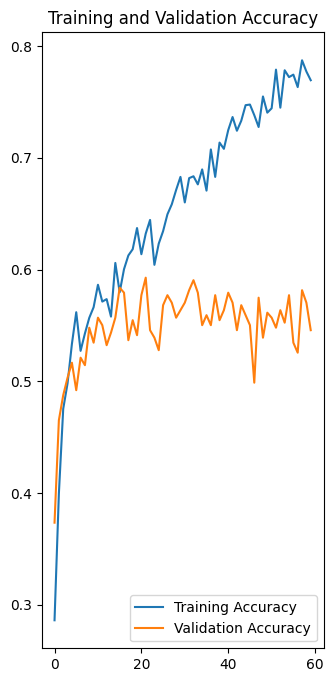

In [ ]:

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')



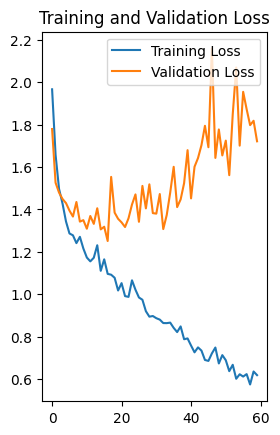

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()